# Parse Json

In [1]:
def parseRaw(json_map):
    url = json_map['url']
    content = json_map['html']
    return (url,content)

# 載入原始 RAW Data

In [2]:
import json
import pprint
pp = pprint.PrettyPrinter(indent=2)
path = "./pixnet.txt"
all_content = sc.textFile(path).map(json.loads).map(parseRaw)

# 使用 BeautifulSoup 及 Jieba 來處理文章內容

In [3]:
def getContent(x):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(x)
    text = soup.getText().replace('\n','').replace('\r','').replace(' ','').replace('\t','')
    import jieba
    r = list()
    

    for term in jieba.cut(text):
        if len(term) > 1 and checkword(term): r.append(term)
    return r
def checkword(x):
    return all(u'\u4e00' <= c <= u'\u9fff' for c in x)

# 印出第一筆資料

In [4]:
parsed = all_content.mapValues(lambda x : getContent(x))
print 'url:',parsed.first()[0]
print 'term:',
for term in parsed.first()[1][:10] :
    print term , 

url: http://lohas.pixnet.net/blog/post/31969271
term: 資訊 大方 曼谷 旅遊 攻略 行程 上網 逛街 百貨 夜市


# 請完成以下程碼來計算 Global 詞頻，並取出前 10 個最常出現的詞

In [5]:
parsed.map(lambda x: x[1]).flatMap(lambda x : x).take(10)

[u'\u8cc7\u8a0a',
 u'\u5927\u65b9',
 u'\u66fc\u8c37',
 u'\u65c5\u904a',
 u'\u653b\u7565',
 u'\u884c\u7a0b',
 u'\u4e0a\u7db2',
 u'\u901b\u8857',
 u'\u767e\u8ca8',
 u'\u591c\u5e02']

In [16]:
from operator import add
top_term = parsed.map(
    lambda x: x[1]).flatMap(
    lambda x : x).map(
    lambda x: (x,1)).reduceByKey(
    add).sortBy(
    lambda x: x[1],ascending=False)
for term in top_term.take(10):
    print term[0] , term[1]

推薦 576
飯店 344
大方 303
京都 295
大阪 272
美食 259
日本 241
曼谷 198
香港 185
酒店 147


# 加碼如可產生 WordCloud

In [7]:
%matplotlib inline


In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS



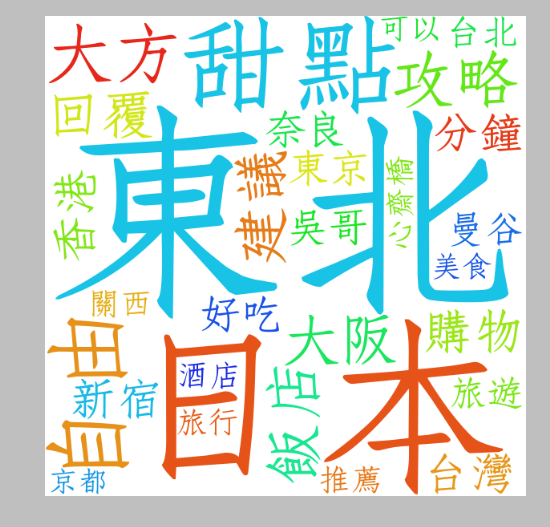

In [27]:
no_urls_no_tags  = " ".join(top_term.map(lambda x : x[0]).take(30))
wordcloud = WordCloud(
                      font_path='./cwTeXQFangsong-Medium.ttf',
                      background_color='white',
                      width=600,
                      height=600
                     ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()